# Get KI carryover seqs

In [34]:

import gc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os
from IPython.utils import io

from pathlib import Path

os.chdir("/home/elise/projects/whole-genome-tiling-predictions/")

In [4]:
patchbio_registry = "/home/elise/patchbio-registry/"

## KSKIS HepG2 is PB-RA-0040
KSKIS_HepG2_path1 = Path(patchbio_registry) / f"MPRA/PB-RA-0040/activity/RNA-vs-DNA-DESeq2-LFC-annotated.csv"
KSKIS_HepG2_path2 = Path(patchbio_registry) / f"MPRA/PB-RA-0040/activity/KleinPlus-DESeq2-LFC-annotated.csv"

## KSKIS N2a is PB-RA-0052
KSKIS_N2a_path1 = Path(patchbio_registry) / f"MPRA/PB-RA-0052/activity/Neuro2a-vs-PreTransfected-DESeq2-LFC-annotated.csv"
KSKIS_N2a_path2 = Path(patchbio_registry) / f"MPRA/PB-RA-0052/activity/KleinPlus-DESeq2-LFC-annotated.csv"

## Icelandic HepG2 is PB-RA-0056
Icelandic_HepG2_path1 = Path(patchbio_registry) / f"MPRA/PB-RA-0056/activity/HepG2-vs-PreTransfected-DESeq2-LFC-annotated.csv"
Icelandic_HepG2_path2 = Path(patchbio_registry) / f"MPRA/PB-RA-0056/activity/KleinPlus-DESeq2-LFC-annotated.csv"

## Icelandic N2a is PB-RA-0054
Icelandic_N2a_path1 = Path(patchbio_registry) / f"MPRA/PB-RA-0054/activity/Neuro2a-vs-PreTransfected-DESeq2-LFC-annotated.csv"
Icelandic_N2a_path2 = Path(patchbio_registry) / f"MPRA/PB-RA-0054/activity/KleinPlus-DESeq2-LFC-annotated.csv"



(208801, 15)


/home/elise/miniconda3/envs/pythia/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(94507, 15)
(303308, 15)
(208801, 15)
(94507, 15)
(303308, 15)
303308
KSKIS probe counts
208801
162053
Icelandic probe counts
94507
72059


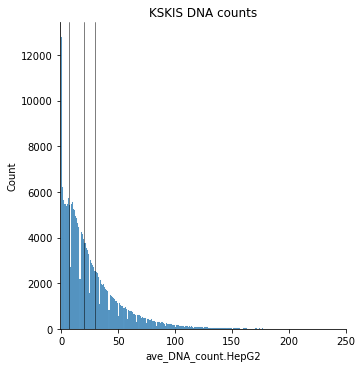

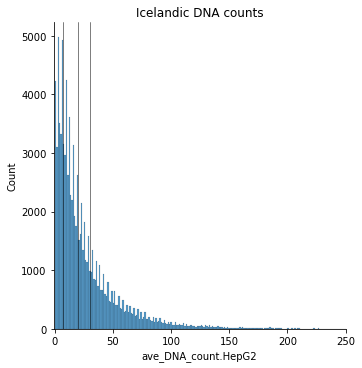

In [5]:
fields = ['PB_ID',
 'baseMean',
 'log2FoldChange',
 'lfcSE',
 'stat',
 'pvalue',
 'padj',
 'type',
 'sequence',
 'library',
 'ave_DNA_cpm',
 'ave_DNA_count',
 'GC',
 'active']

KSKIS_HepG2_df = ( pd.concat( 
    [ pd.read_table(KSKIS_HepG2_path1, sep=',', usecols=fields),
     pd.read_table(KSKIS_HepG2_path2, sep=',', usecols=fields) ] ) 
                  .drop_duplicates(subset='sequence',keep=False)  
               .assign(assay='KSKIS') )
print(KSKIS_HepG2_df.shape)

#ks_fields=list(KSKIS_HepG2_df.columns)
Ice_HepG2_df = ( pd.concat( 
    [ pd.read_table(Icelandic_HepG2_path1, sep=',', usecols=fields),
     pd.read_table(Icelandic_HepG2_path2, sep=',', usecols=fields) ] ) 
                  .drop_duplicates(subset='sequence',keep=False) 
               .assign(assay='Ice') )
print(Ice_HepG2_df.shape)

all_HepG2_df = pd.concat( [KSKIS_HepG2_df, Ice_HepG2_df] )
print(all_HepG2_df.shape)


KSKIS_N2a_df = ( pd.concat( 
    [ pd.read_table(KSKIS_N2a_path1, sep=',', usecols=fields),
     pd.read_table(KSKIS_N2a_path2, sep=',', usecols=fields) ] ) 
                  .drop_duplicates(subset='sequence',keep=False)  
               .assign(assay='KSKIS') )
print(KSKIS_N2a_df.shape)

Ice_N2a_df = ( pd.concat( 
    [ pd.read_table(Icelandic_N2a_path1, sep=',', usecols=fields),
     pd.read_table(Icelandic_N2a_path2, sep=',', usecols=fields) ] ) 
                  .drop_duplicates(subset='sequence',keep=False)  
               .assign(assay='Ice') )
print(Ice_N2a_df.shape)

all_N2a_df = pd.concat( [KSKIS_N2a_df, Ice_N2a_df] )
print(all_N2a_df.shape)


all_lfc_both = all_HepG2_df.merge(all_N2a_df,
                                      left_on=('PB_ID','sequence','assay','library'),
                                      right_on=('PB_ID','sequence','assay','library'),
                                     suffixes=('.HepG2','.N2a')).sort_values('library')
print(all_lfc_both.shape[0])

sns.displot(all_lfc_both[all_lfc_both['assay'] == 'KSKIS']["ave_DNA_count.HepG2"])
plt.title('KSKIS DNA counts')
plt.axvline(x=30, color='black', linewidth=.5)
plt.axvline(x=20, color='black', linewidth=.5)
plt.axvline(x=7, color='black', linewidth=.5)
plt.xlim(-1,250)

print('KSKIS probe counts')
print(all_lfc_both[all_lfc_both['assay'] == 'KSKIS'].shape[0])
print(all_lfc_both[(all_lfc_both['assay'] == 'KSKIS') & 
                   (all_lfc_both['ave_DNA_count.HepG2'] >= 7)].shape[0])

#sns.violinplot(x=all_lfc_both[all_lfc_both['assay'] == 'KSKIS']['library'],
#               y=all_lfc_both[all_lfc_both['assay'] == 'KSKIS']['ave_DNA_count.HepG2'])
#plt.title('KSKIS DNA counts by library')

#sns.violinplot(x=all_lfc_both[all_lfc_both['assay'] == 'KSKIS']['library'],
#               y=all_lfc_both[all_lfc_both['assay'] == 'KSKIS']['ave_DNA_count.HepG2'])
#plt.ylim(0,100)
#plt.title('KSKIS DNA counts by library')

sns.displot(all_lfc_both[all_lfc_both['assay'] == 'Ice']["ave_DNA_count.HepG2"])
plt.title('Icelandic DNA counts')
plt.axvline(x=30, color='black', linewidth=.5)
plt.axvline(x=20, color='black', linewidth=.5)
plt.axvline(x=7, color='black', linewidth=.5)
plt.xlim(-1,250)

print("Icelandic probe counts")
print(all_lfc_both[all_lfc_both['assay'] == 'Ice'].shape[0])
print(all_lfc_both[(all_lfc_both['assay'] == 'Ice') & 
                   (all_lfc_both['ave_DNA_count.HepG2'] >= 7)].shape[0])


#sns.violinplot(x=all_lfc_both[all_lfc_both['assay'] == 'Ice']['library'],
#               y=all_lfc_both[all_lfc_both['assay'] == 'Ice']['ave_DNA_count.HepG2'])
#plt.xticks(rotation=45)
#plt.title('Icelandic DNA counts by library')

#sns.violinplot(x=all_lfc_both[all_lfc_both['assay'] == 'Ice']['library'],
#               y=all_lfc_both[all_lfc_both['assay'] == 'Ice']['ave_DNA_count.HepG2'])
#plt.ylim(0,100)
#plt.xticks(rotation=45)
#plt.title('Icelandic DNA counts by library')



#print(all_lfc_both[all_lfc_both["ave_DNA_count.HepG2"] >= 30 & all_lfc_both["assay"] == "Ice"])

In [38]:
KSKIS_both_df = ( KSKIS_HepG2_df
                 .rename(columns={'log2FoldChange':'HepG2'})
                 .filter(['PB_ID','sequence','ave_DNA_count','library','HepG2'])
                 .merge(KSKIS_N2a_df
                       .rename(columns={'log2FoldChange':'N2a'})
                        .filter(['PB_ID','sequence','ave_DNA_count','library','N2a']),
                        on=('PB_ID','sequence','ave_DNA_count','library'))
                .query('ave_DNA_count > 20')
                .assign(diff = lambda x: x['HepG2'] - x['N2a']))

Ice_both_df = ( Ice_HepG2_df
                 .rename(columns={'log2FoldChange':'HepG2'})
                 .filter(['PB_ID','sequence','ave_DNA_count','library','HepG2'])
                 .merge(Ice_N2a_df
                       .rename(columns={'log2FoldChange':'N2a'})
                        .filter(['PB_ID','sequence','ave_DNA_count','library','N2a']),
                        on=('PB_ID','sequence','ave_DNA_count','library'))
                .query('ave_DNA_count > 20')
              .assign(diff = lambda x: x['HepG2'] - x['N2a']))

In [39]:
print(KSKIS_both_df.shape)
print(Ice_both_df.shape)

(95655, 7)
(39871, 7)


Text(0.5, 1.0, 'Icelandic activity')

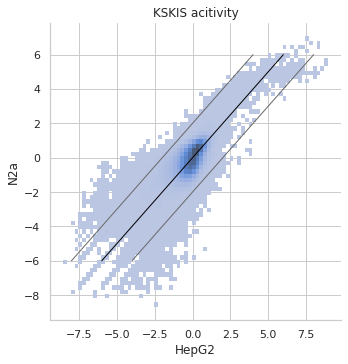

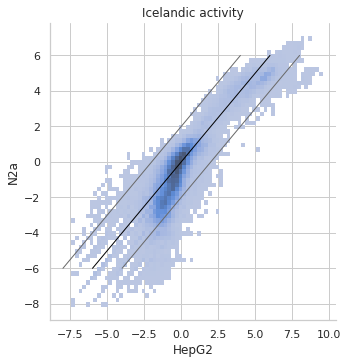

In [29]:
sns.set(style='whitegrid')

sns.displot(data=KSKIS_both_df,
                x='HepG2',
                y='N2a',
           binwidth=(.25,.25))
plt.plot([-6,6],[-6,6],
        linewidth=1,
        color='black')
plt.plot([-8,4],[-6,6],
        linewidth=1,
        color='dimgray')
plt.plot([-4,8],[-6,6],
        linewidth=1,
        color='dimgray')
plt.title("KSKIS acitivity")

sns.displot(data=Ice_both_df,
                x='HepG2',
                y='N2a',
           binwidth=(.25,.25))
plt.plot([-6,6],[-6,6],
        linewidth=1,
        color='black')
plt.plot([-8,4],[-6,6],
        linewidth=1,
        color='dimgray')
plt.plot([-4,8],[-6,6],
        linewidth=1,
        color='dimgray')
plt.title("Icelandic activity")

In [131]:
KSKIS_diff = (KSKIS_both_df
              .query('abs(diff) > 1.5'))
print(KSKIS_diff.shape)

Ice_diff = (Ice_both_df
            .query('abs(diff) > 1.5'))
print(Ice_diff.shape)

(6477, 7)
(6717, 7)


In [99]:
print(KSKIS_diff.query("abs(diff) > 2.5 & \
                            (HepG2<-.5 | HepG2>.5) & \
                            (N2a<-.5 | N2a>.5) & \
                            HepG2*N2a<1"))
print(Ice_diff.query("abs(diff) > 2.5 & \
                            (HepG2<-.5 | HepG2>.5) & \
                            (N2a<-.5 | N2a>.5) & \
                            HepG2*N2a<1"))

                     PB_ID                                           sequence  \
2240    PB-TL-0002-0002549  CAGAGCAGGGGAGAAGTGTGGCTGGCAGTCTATGTTAGGGCTTTGC...   
4443    PB-TL-0002-0005057  TTGTTCCTTAAAAGTGAAACAGTCAGGCTCTCTTCTGGACATTTGC...   
6228    PB-TL-0002-0007010  GAAGATGAATGACAAGAAGACCTGGGAGTACCTCCGCTCACAGAAC...   
9427    PB-TL-0002-0010420  TTGGGAGGCCGAGCCAGGCGGATCACCTGAGGTCAGGATTTCGAGA...   
11642   PB-TL-0002-0012705  GTGAGACCAGCCTGGCCAACATGGTGAAACCCAATCTCTACCAAAA...   
...                    ...                                                ...   
198865   PB-TL-0018-004092  TCTTTGTCGGGGCCATCAGGCTTGGCTGTCTGGCCAGCACTTCGGG...   
199070   PB-TL-0018-004297  TGGGCAGATTAAAGTGTAAGAAGCAGGCCGGGTGCAGTGGCTCAGC...   
202008   PB-TL-0018-007563  GAAGGAGGCTGCAAAGTGGCGGCTGGGCGACAGTGGAGGTCCCGGG...   
203763   PB-TL-0018-010504  CAGGATGGGTAAAGGTACAGAGAAGGACTTGCAGGTAAGGGGAACA...   
204420   PB-TL-0010-001269  ATCTGCATGGTATGCAAAGCAGAAAAGTTAAAGCGAAATAATGAAT...   

        ave_DNA_count     l

In [146]:
both_diff_filt = ( KSKIS_diff.query("(abs(diff) > 5) | \
                                       (abs(diff) > 3.5 & HepG2*N2a<0) | \
                                       (abs(diff) > 2.5 & (2<HepG2<4 | 0<N2a<4)) | \
                                        (abs(diff) > 1.9 & N2a > 3 & HepG2 < 5)")
 .append(Ice_diff.query("(abs(diff) > 5) | \
                         (abs(diff) > 3.5 & HepG2*N2a<0) | \
                                       (abs(diff) > 2.5 & (2<HepG2<4 | 0<N2a<4)) | \
                                        (abs(diff) > 1.9 & N2a > 3 & HepG2 < 5)"))
  .assign(seq12 = lambda x: x['sequence'].str[:12])
  .assign(abs_diff = lambda x: abs(x['diff'])) )
                     
print(both_diff_25_filt.shape)
print(both_diff_25_filt.columns)
print(both_diff_25_filt['library'].value_counts())
print(both_diff_filt['seq12'].value_counts())

both_diff_filt = (both_diff_filt
                       .sort_values('abs_diff',ascending=False)
                       .drop_duplicates('seq12'))
print(both_diff_filt.shape)
print(both_diff_filt['library'].value_counts())

both_diff_filt.to_csv("library/KI_diff_filt.txt",
         sep='\t',
         index=False) 


(301, 7)
Index(['PB_ID', 'sequence', 'ave_DNA_count', 'library', 'HepG2', 'N2a',
       'diff'],
      dtype='object')
PB-TL-0002    68
PB-TL-0005    63
PB-TL-0018    53
PB-TL-0024    25
PB-TL-0019    23
PB-TL-0020    15
PB-TL-0021    11
PB-TL-0022     9
PB-TL-0001     9
PB-TL-0011     6
PB-TL-0004     6
PB-TL-0007     5
PB-TL-0013     4
PB-TL-0016     2
PB-TL-0010     2
Name: library, dtype: int64
TCAGATCAGCAC    5
CCTGAGGTCAGG    4
TCCTGTCTGTTT    3
CACGAGGTCAGG    3
CTTGAGGTCAGG    2
               ..
AAGCTGTGCCGA    1
GTTGCCCAGGCT    1
TTTGCTTTTTTT    1
CAGGAGTTCAAG    1
GTTGCTATTCGC    1
Name: seq12, Length: 282, dtype: int64
(282, 9)
PB-TL-0002    67
PB-TL-0005    63
PB-TL-0018    48
PB-TL-0019    23
PB-TL-0024    19
PB-TL-0021    11
PB-TL-0020     9
PB-TL-0001     9
PB-TL-0022     8
PB-TL-0011     6
PB-TL-0004     6
PB-TL-0007     5
PB-TL-0013     4
PB-TL-0016     2
PB-TL-0010     2
Name: library, dtype: int64


In [52]:
KSKIS_top_HepG2 = KSKIS_both_df.query('HepG2 > 7')
print(KSKIS_top_HepG2)

Ice_top_HepG2 = Ice_both_df.query('HepG2 > 7')
print(Ice_top_HepG2)

both_top_HepG2 = KSKIS_top_HepG2.append(Ice_top_HepG2)
print(both_top_HepG2['library'].value_counts())

both_top_HepG2['seq12'] = both_top_HepG2['sequence'].str[:12]
print(both_top_HepG2['seq12'].value_counts())

both_top_HepG2_filt = (both_top_HepG2
                       .sort_values('HepG2',ascending=False)
                       .drop_duplicates('seq12'))
print(both_top_HepG2_filt['library'].value_counts())

                    PB_ID                                           sequence  \
198925  PB-TL-0018-004152  TGAGGTCGGAAGTTCAAGACCAGCCTGATCAACATGGAGAAACCCT...   
199636  PB-TL-0018-004871  AACCTGAGGTCAGGAGTTCAAGACCAGCCTGGGCAACATGGTGAAA...   
199985  PB-TL-0018-005263  CACGAGGTCAAGAGTTCGAGACAATCCTGGCCAACATGGTGAAACC...   
199986  PB-TL-0018-005265  CACGAGGTCAAGAGTTCGAGACCATCCTGGCCAACATGGTGAAACC...   
200003  PB-TL-0018-005286  CAGATCACAAGGTCAGGAGATCGAGACCATCCTGGCTAACACGGCG...   
200094  PB-TL-0018-005391  CCCGAGGTCAAGAGTTCGAGACCATCCTGGCCAACATGGTGAAACC...   
200119  PB-TL-0018-005418  CCTGAGGTCGAGAGTTCGAGACCAGCCTGGCCAATATGGAGAAACC...   
200259  PB-TL-0018-005577  GAACACGAGGTCAGGAGTTCGAGACCAGCCTGGCCAACATGGTGAA...   
200278  PB-TL-0018-005603  GACCACGAGGTCAGGAGTTCGAGACCAGCCTGGCACCATCTCTACT...   
200453  PB-TL-0018-005797  GCAGATAACCTGAGGTCAGGAGTTCGAGACCAGCCCGGGATGAAAC...   
201093  PB-TL-0018-006527  TATCACGAGGTCAGGAGTTCGAGACCAGCCTGGCCAGCACCCTCTG...   
201111  PB-TL-0018-006546  TCAAGATCACGAG

In [54]:
KSKIS_top_N2a = KSKIS_both_df.query('N2a > 5.5')
print(KSKIS_top_N2a)

Ice_top_N2a = Ice_both_df.query('N2a > 5.5')
print(Ice_top_N2a)

both_top_N2a = KSKIS_top_N2a.append(Ice_top_N2a)
print(both_top_N2a['library'].value_counts())

both_top_N2a['seq12'] = both_top_N2a['sequence'].str[:12]
print(both_top_N2a['seq12'].value_counts())

both_top_N2a_filt = (both_top_N2a
                       .sort_values('N2a',ascending=False)
                       .drop_duplicates('seq12'))
print(both_top_N2a_filt['library'].value_counts())

                     PB_ID                                           sequence  \
87052   PB-TL-0002-0094660  CAGATCGCAAGGTTAGGAGATCGAGACCATCCTGGCTAACACGGTG...   
197841   PB-TL-0018-003049  GGAGGCCGAGGTGGGTGGATCACCTGAGGTTGGGAGTTCGAGACCA...   
198917   PB-TL-0018-004144  TGAGGCGGGTGGATCACGAGGTCAAGAGATCGAGACCACCCTGGCC...   
199062   PB-TL-0018-004289  TGGGCAGATCACGAGGTCAGGAGATCGAGACCATCATGGCTAACAC...   
199443   PB-TL-0018-004673  TTGGGAGGCCAAGGTGGACAGTTCACCTGAGGTCGGGAGTTCGAGA...   
199808   PB-TL-0018-005062  AGGCCACTGAGGCAGACAGATCATCCTGAGGTCAGAAGTTCGAAAC...   
199851   PB-TL-0018-005109  AGGTCGGGAGTTCGAGACCAGCCTGACCAACATGGCGAAACCCCAT...   
199867   PB-TL-0018-005127  AGGTTCGAGACCAGCCTGGATCACAAGGTCAGGAGTTCGAGACTAG...   
200003   PB-TL-0018-005286  CAGATCACAAGGTCAGGAGATCGAGACCATCCTGGCTAACACGGCG...   
200004   PB-TL-0018-005287  CAGATCGCAAGGTTAGGAGATCGAGACCATCGAGAACATCCTCTAC...   
200259   PB-TL-0018-005577  GAACACGAGGTCAGGAGTTCGAGACCAGCCTGGCCAACATGGTGAA...   
200273   PB-TL-0018-005598  

In [65]:
KSKIS_bot_HepG2 = KSKIS_both_df.query('-7.02 < HepG2 < -7 | -6.02 < HepG2 < -6 | -5.02 < HepG2 < -5 | -4.01 < HepG2 < -4 | -3.01 < HepG2 < -3')
print(KSKIS_bot_HepG2)

Ice_bot_HepG2 = Ice_both_df.query('-7.02 < HepG2 < -7 | -6.02 < HepG2 < -6 | -5.02 < HepG2 < -5 | -4.01 < HepG2 < -4 | -3.01 < HepG2 < -3')
print(Ice_bot_HepG2)

both_bot_HepG2 = KSKIS_bot_HepG2.append(Ice_bot_HepG2)
print(both_bot_HepG2['library'].value_counts())

both_bot_HepG2['seq12'] = both_bot_HepG2['sequence'].str[:12]
print(both_bot_HepG2['seq12'].value_counts())

both_bot_HepG2_filt = (both_bot_HepG2
                       .sort_values('HepG2',ascending=True)
                       .drop_duplicates('seq12'))
print(both_bot_HepG2_filt['library'].value_counts())

                     PB_ID                                           sequence  \
3643    PB-TL-0002-0004139  TTTGGGCAGCCCGGTGGGGGTCCCGGGGGCGGGCGGCGGGACGGCG...   
4545    PB-TL-0002-0005176  AGTTTCTTGAGCAACTCAAAATAAATATGCATCTGGGCTTGTTCTT...   
8017    PB-TL-0002-0008938  AGGCTGGCTGGGCCACAGAGGCCATCACCTGCTTCCTGGGACTTTG...   
18315   PB-TL-0002-0019558  AAATGGGGAGTGTTATTATCTCCATTTTAGCAATGGGGGAGGACAC...   
47159   PB-TL-0002-0050406  TATGCAAATGACTATCATGAGGGAAGGAGTTTGCTCGTAGTTCCCT...   
52036   PB-TL-0002-0055645  TGGGACAGAAAGCAGAGTGAGCCCCAGAGACTCCCTCAAGGAGCTG...   
59738   PB-TL-0002-0064102  GCAACTCTGTTTCCATTCTTCCGGGGTTCATGGGAGAGAACCTTCT...   
60437   PB-TL-0002-0064939  TCGGCCCGTTCCTCCGGACCCGAGAGGCCGCCGCACGGGGTACGGG...   
74825   PB-TL-0002-0081308  CGCTCTTCCTACCCACTCCTCCTTCCTTCTCTCTCTCTCTCTCTCT...   
75142   PB-TL-0002-0081633  ACCTTGAGCAGGTTATTTAACCTCTCAGAGCATCAGTTTCCTCATC...   
77381   PB-TL-0002-0084052  TCTTCCTTGATTTCAAGGACCATTCACAATCTGTGCTGAAGGAGTC...   
82017   PB-TL-0002-0089259  

In [1]:
KSKIS_bot_N2a = KSKIS_both_df.query('-7.02 < N2a < -7 | -6.02 < N2a < -6 | -5.02 < N2a < -5 | -4.01 < N2a < -4 | -3.01 < N2a < -3')
print(KSKIS_bot_N2a)

Ice_bot_N2a = Ice_both_df.query('-7.02 < N2a < -7 | -6.02 < N2a < -6 | -5.02 < N2a < -5 | -4.01 < N2a < -4 | -3.01 < N2a < -3')
print(Ice_bot_N2a)

both_bot_N2a = KSKIS_bot_N2a.append(Ice_bot_N2a)
print(both_bot_N2a['library'].value_counts())

both_bot_N2a['seq12'] = both_bot_N2a['sequence'].str[:12]
print(both_bot_N2a['seq12'].value_counts())

both_bot_N2a_filt = (both_bot_N2a
                       .sort_values('N2a',ascending=True)
                       .drop_duplicates('seq12'))
print(both_bot_N2a_filt['library'].value_counts())

NameError: name 'KSKIS_both_df' is not defined

(210, 8)
PB-TL-0024    139
PB-TL-0018     41
PB-TL-0022     29
PB-TL-0021      1
Name: library, dtype: int64
(216, 8)
PB-TL-0019    64
PB-TL-0005    54
PB-TL-0002    32
PB-TL-0007    16
PB-TL-0004    15
PB-TL-0011    10
PB-TL-0021     7
PB-TL-0013     7
PB-TL-0016     4
PB-TL-0001     2
PB-TL-0008     2
PB-TL-0024     1
PB-TL-0010     1
PB-TL-0018     1
Name: library, dtype: int64


Text(0.5, 1.0, 'Measured activities of control seqs')

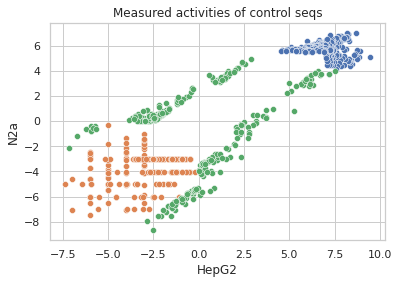

In [148]:

both_top_filt = both_top_HepG2_filt.append(both_top_N2a_filt).drop_duplicates()
print(both_top_filt.shape)
print(both_top_filt['library'].value_counts())

both_top_filt.to_csv("library/KI_top_filt.txt",
         sep='\t',
         index=False) 


both_bot_filt = both_bot_HepG2_filt.append(both_bot_N2a_filt).drop_duplicates()
print(both_bot_filt.shape)
print(both_bot_filt['library'].value_counts())

both_bot_filt.to_csv("library/KI_bot_filt.txt",
         sep='\t',
         index=False) 


sns.scatterplot(data=both_top_filt,
                x='HepG2',y='N2a')
sns.scatterplot(data=both_bot_filt,
                x='HepG2',y='N2a')

sns.scatterplot(data=both_diff_25_filt,
                x='HepG2',y='N2a')
plt.title('Measured activities of control seqs')


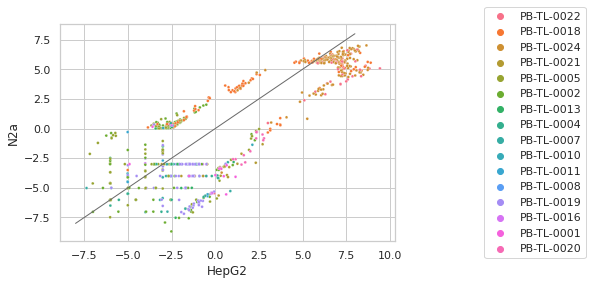

In [149]:

sns.scatterplot(data=both_top_filt.append(both_bot_filt.append(both_diff_25_filt)),
                x='HepG2',y='N2a',
                hue='library',s=8).legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.plot([-8,8],[-8,8],
        linewidth=1,
        color='dimgray')

In [120]:
gc.collect()

4862